# Part B: 
## 1. Build a wine quality prediction model using K-NN
## 2. Implement k-means clustering algorithm using scikit on IRIS

In [1]:
# Imports....the usual suspects
import postgresql
import pandas
import sklearn
import matplotlib
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

## 1. Download the Wine Quality Dataset from the UCI
http://archive.ics.uci.edu/ml/datasets/Wine+Quality
Look for the 'Data Folder' link near top

In [2]:
red_df = pandas.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')
red_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


## 2. Split the Red Wine Dataset into training and testing

In [3]:
red_x_train, red_x_test, red_y_train, red_y_test = train_test_split(red_df.drop(columns=['quality']), red_df['quality'])

## 3. Build a K-NN Regression Model to predict the continuous quality variable in the Red Wine Dataset.  Predict for your test set (you're estimating quality column)

Hint, you may want to drop the last element of your test set if it's a giant array: red_y_test[:-1]

In [4]:
clf = KNeighborsRegressor(n_neighbors=13)
clf.fit(red_x_train, red_y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                    weights='uniform')

## 4. What is the mean of the differences between the Y actuals (quality column) and your rounded predictions?

In [5]:
red_y_results = pandas.DataFrame(red_y_test)
red_y_results['prediction'] = clf.predict(red_x_test)
red_y_results['pred_rounded'] = red_y_results['prediction'].round().astype(int)
red_y_results['error'] = red_y_results['pred_rounded'] - red_y_results['quality']
red_y_results.tail()

,quality,prediction,pred_rounded,error
1070,7,5.692308,6,-1
496,6,5.538462,6,0
1229,5,5.307692,5,0
565,5,5.846154,6,1
349,6,5.846154,6,0


In [6]:
red_y_results['error'].abs().mean()

0.57

## 5. Repeat steps 2-5 after applying PCA to the data. 

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(red_x_train)

x_pca = pca.transform(red_x_train)
x_pca_test = pca.transform(red_x_test)

clf = KNeighborsRegressor(n_neighbors=13)
clf.fit(x_pca, red_y_train)

red_y_results = pandas.DataFrame(red_y_test)
red_y_results['prediction'] = clf.predict(x_pca_test)
red_y_results['pred_rounded'] = red_y_results['prediction'].round().astype(int)
red_y_results['error'] = red_y_results['pred_rounded'] - red_y_results['quality']
red_y_results.tail()

,quality,prediction,pred_rounded,error
1070,7,5.692308,6,-1
496,6,5.461538,5,-1
1229,5,5.384615,5,0
565,5,5.461538,5,0
349,6,6.076923,6,0


In [8]:
red_y_results['error'].abs().mean()

0.595

## 6. Did PCA help accuracy?

Not in this case.  However, accuracy was similar with significantly reduced dimensionality.

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
# scaler = StandardScaler()
scaler = MinMaxScaler()
# scaler = Normalizer()
x_df_scaled = scaler.fit_transform(red_df.drop(columns=['quality']))
x_train, x_test, y_train, y_test = train_test_split(x_df_scaled, red_df['quality'])

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_train)

x_pca = pca.transform(x_train)
x_pca_test = pca.transform(x_test)

clf = KNeighborsRegressor(n_neighbors=13)
clf.fit(x_pca, y_train)

red_y_results = pandas.DataFrame(y_test)
red_y_results['prediction'] = clf.predict(x_pca_test)
red_y_results['pred_rounded'] = red_y_results['prediction'].round().astype(int)
red_y_results['error'] = red_y_results['pred_rounded'] - red_y_results['quality']
red_y_results.tail()

,quality,prediction,pred_rounded,error
1482,4,6.000000,6,2
885,5,5.692308,6,1
819,5,5.153846,5,0
925,7,5.923077,6,-1
1475,7,6.615385,7,0


In [50]:
red_y_results['error'].abs().mean()

0.4825

In [9]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [10]:
iris = datasets.load_iris()

In [11]:
X = iris.data[:, :2]
y = iris.target

Text(0, 0.5, 'Sepal Width')

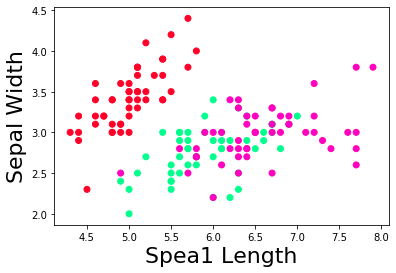

In [12]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=22)
plt.ylabel('Sepal Width', fontsize=22)

In [13]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [14]:
centers = km.cluster_centers_
print(centers)

[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


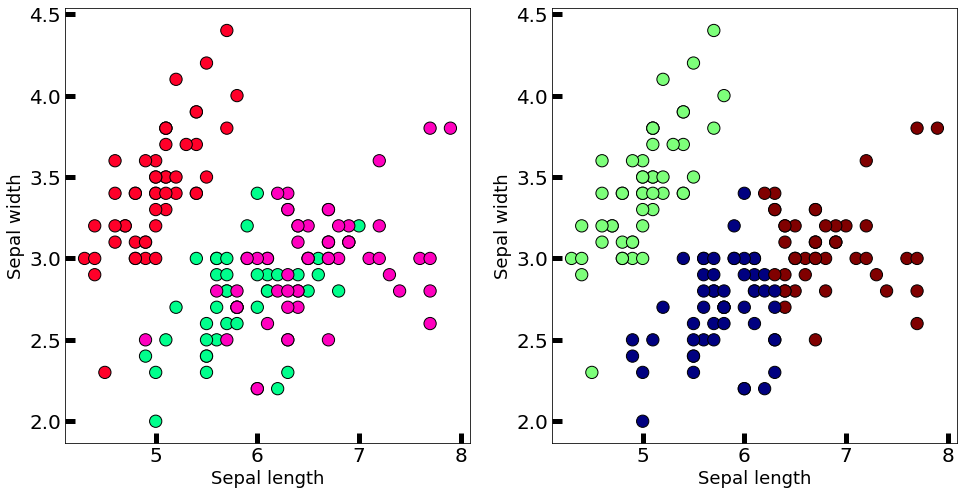

In [15]:
new_labels = km.labels_
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)